# Homework 2

## Boston Housing Price Prediction

## Demetrios Lambropoulos


### Derivation of Normal Equation

Normal Equation is 

$$ \hat{\beta} = (X^TX)^{-1}X^Ty$$

$$ RSS(\beta) = \sum_{i=1}^N (y_i - f(x_i))^2$$

<br/>

$$ = \sum_{i=1}^N (y_i-x_i^T \cdot\beta)^2$$

<br/>

$$ = (y - X \cdot \beta)^T(y - X \cdot \beta)$$

<br/>

$$= y^Ty - \beta^T\cdot X^T \cdot y - y^T \cdot X \cdot \beta + \beta^T \cdot X^T \cdot X \cdot \beta$$

<br/>

We will now take the partial derivative of $RSS(\beta)$

<br/>

$$ \frac{\partial RSS(\beta)}{\partial \beta}= \frac{\partial}{\partial \beta} [ y^Ty - \beta^TX^Ty - y^TX\beta + \beta^TX^TX\beta ] $$

<br/>

$$ \frac{\partial y^Ty}{\partial\beta} = 0 $$

<br/>

$$ \beta^T \cdot X^T = (X\cdot\beta)^T \rightarrow (X\cdot\beta)^T\cdot y$$

<br/>

We also have the term 

$$ y^T\cdot (X\cdot\beta)$$

From the commutative property we can see that

<br/>

$$ x\cdot y^T = y\cdot x^T$$

<br/>

$$ \therefore (X\cdot\beta)^T\cdot y = y^T \cdot (X\cdot\beta)$$

<br/>

Since the partial derivative of $y^Ty$ goes to zero as we seen with 

the partial derivate and applying the commutative property we now have 

<br/>

$$ \frac{\partial}{\partial \beta}[\beta^T\cdot X^T\cdot X\cdot\beta - 2(X\cdot\beta)^T\cdot y]$$

<br/>

$$ = \frac{\partial}{\partial \beta} [\beta^T\cdot X^T\cdot X\cdot\beta] - \frac{\partial}{\partial\beta}[2(X\cdot\beta)^T\cdot y]$$

<br/>

Working on the partial derivative of the left term we can apply

 the matrix calculus formula 

$$ \frac{\partial x^TAx}{\partial x} = x^T(A+A^T)$$

which result in

<br/>

$$ \frac{\partial}{\partial\beta}[\beta^T\cdot X^T\cdot X\cdot\beta]= \beta^T ( (X^TX) + (X^TX)^T ) $$

<br/>

$$ = 2 \beta^T (X^TX)$$

<br/>

$$ = \boxed{2 (X^TX)\beta}$$

<br/>

Now to work on the right term we can take the constant $2$ out and 

apply the transpose on $ (X\cdot\beta)^T$ giving us

$$ 2 \frac{\partial}{\partial\beta}\beta^TX^Ty$$

and using the property 

$$\frac{\partial x^TA}{\partial x} = A^T$$

we will get 

$$ 2\frac{\partial}{\partial\beta}\beta^TX^Ty = 2(X^Ty)^T = \boxed{2y^TX}$$

Now combining the left and the right parts we now have 

$$ 2(X^TX)\beta - 2y^TX $$

Next lets consider that the global minimum will be found 

when this equation results in 0. 

So we can set the equation equal to zero and solve for $\beta$.

$$ 2(X^TX)\beta-2y^TX=0 $$

<br/>

$$ 2(X^TX)\beta = 2y^TX $$

<br/>

$$ \beta = \frac{2y^TX}{2(X^TX)} $$

<br/>

$$ \beta = (X^TX)^{-1}(y^TX) $$

Once again we can apply the commutative property from before 

on the term $(y^TX)$

$$ \therefore \boxed{\beta = (X^TX)^{-1}X^Ty} $$

### Initialization

In [0]:
# Initialize the working environment libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Load the data set
data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

# Display the head of the loaded data
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Text(0, 0.5, 'medv (median house value)')

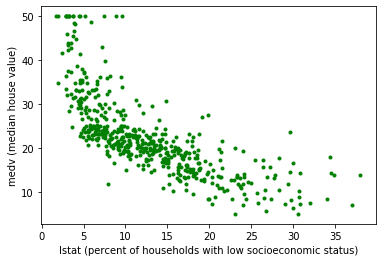

In [0]:
# Observe the relationship between lstat and medv
plt.plot(data['lstat'], data['medv'], 'g.')
plt.xlabel('lstat (percent of households with low socioeconomic status)')
plt.ylabel('medv (median house value)')

### Obtain estimates of $\beta_0$ and $\beta_1$

Our $\hat{\beta_1}$ will be calculated as follows 

$$\hat{\beta_1} = \frac{\sum_{i=1}^N(x_i-\bar{x})(y_i - \bar{y})}{\sum_{i=1}^N (x_i - \bar{x})^2}$$

Our $\hat{\beta_0}$ can be calculated as follows

$$\hat{\beta_0}=\bar{y} - \hat{\beta_1}\bar{x}$$

where $\bar{y}$ and $\bar{x}$ are calculated as follows

$$\bar{x}=\sum_{i=1}^N x_i$$
$$\bar{y}=\sum_{i=1}^N y_i$$

In [0]:
# Apply the formula directly to get beta_0 and beta_1
xbar = sum(data['lstat'])/len(data['lstat'])
ybar = sum(data['medv'])/len(data['medv'])

numerator = sum( (data['lstat'] - xbar) * (data['medv'] - ybar) )
denominator = sum( ( data['lstat'] - xbar ) ** 2 )

beta1 = numerator / denominator

beta0 = ybar - ( beta1 * xbar )

print ("Beta 0: ", beta0)
print ("Beta 1: ", beta1)

Beta 0:  34.553840879383124
Beta 1:  -0.9500493537579905


In [0]:
# Compare results to regression fit 
from sklearn.linear_model import LinearRegression

model_slm = LinearRegression()
model_slm.fit(data[['lstat']], data['medv'])

print ("Beta 0: ", model_slm.intercept_)
print ("Beta 1: ", model_slm.coef_)

Beta 0:  34.5538408793831
Beta 1:  [-0.95004935]


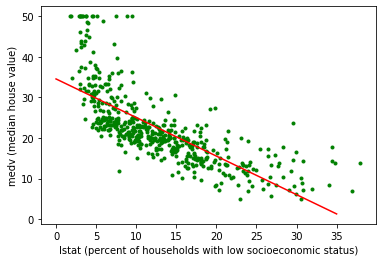

In [0]:
# Display beta coefficients with the data 

plt.plot(data['lstat'], data['medv'], 'g.')
plt.xlabel('lstat (percent of households with low socioeconomic status)')
plt.ylabel('medv (median house value)')

# Plot the found beta coefficients
x_coor = np.array([0, 35])
y_coor = x_coor * beta1 + beta0
plt.plot(x_coor, y_coor, "r-")


### 95% Confidence Interval

95% Confidence intervals for $\beta_0$ and $\beta_1$ are as follows

$$ [\hat{\beta_1} + 2 \sqrt{Var(\hat{\beta_1})} , \hat{\beta_1} - 2 \sqrt{Var(\hat{\beta_1})}] $$

$$ [\hat{\beta_0} + 2 \sqrt{Var(\hat{\beta_0})} , \hat{\beta_0} - 2 \sqrt{Var(\hat{\beta_0})}] $$

The variance of $\hat{\beta_1}$ and $\hat{\beta_0}$ can be found as follows

$$ Var(\hat{\beta_0}) = \frac{\sigma^2 \sum_{i=1}^n x_i^2}{N\sum_{i=1}^N (x_i - \bar{x})^2} $$

$$ Var(\hat{\beta_1}) = \frac{\sigma^2}{\sum_{i=1}^N(x_i - \bar{x})^2} $$

Since sigma is not known we can estimate it by the Residual Standard Error (RSE) squared as follows 

$$ RSE(\hat{\beta})^2=\frac{\sum_{i=1}^N(y_i - \hat{\beta_0} - \hat{beta_1}x_i)^2}{N-2}$$

In [0]:
import math

RSE_num = sum( (data['medv']  - beta0 - (beta1 * data['lstat'])) ** 2 )
RSE_den = len(data['medv']) - 2

sigma = RSE_num / RSE_den

print ("RSE_squared: ", sigma)

VarBeta0_num = (sigma) * sum( data['lstat'] ** 2 )
N = len( data['medv'] )
VarBeta0_den = N * sum( (data['lstat'] - xbar) ** 2 )

VarBeta0 = VarBeta0_num / VarBeta0_den

print ("Variance of beta0: ", VarBeta0)

VarBeta1_num = sigma
VarBeta1_den = sum ( ( data['lstat'] - xbar ) ** 2 )

VarBeta1 = VarBeta1_num / VarBeta1_den

print("Variance of beta1: ", VarBeta1)

beta1_conf_upper = beta1 + 2 * math.sqrt(VarBeta1)
beta1_conf_lower = beta1 - 2 * math.sqrt(VarBeta1)

print ("Confidence interval for beta1: [",beta1_conf_upper,",",beta1_conf_lower,"]")

beta0_conf_upper = beta0 + 2 * math.sqrt(VarBeta0)
beta0_conf_lower = beta0 - 2 * math.sqrt(VarBeta0)

print ("Confidence interval for beta2: [",beta0_conf_upper,",",beta0_conf_lower,"]")

RSE_squared:  38.63567741731437
Variance of beta0:  0.31654954058127993
Variance of beta1:  0.0015002775315015582
Confidence interval for beta1: [ -0.8725825213327116 , -1.0275161861832693 ]
Confidence interval for beta2: [ 35.67909558935999 , 33.42858616940626 ]


### RSE

Residual Standard Error is given by the following

$$ RSE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^N(y_i - \hat{y_i})^2}{n-1}} = \sqrt{\frac{\sum_{i=1}^N(y_i - \hat{\beta_0} - \hat{\beta_1}x_i)^2}{n-2}}$$

Residual Standard Error:  6.215760405398069


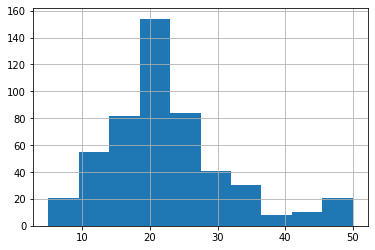

In [0]:
y_pred = beta1 * data['lstat'] + beta0

RSE = math.sqrt( ( sum ( ( data['medv'] - y_pred ) ** 2 ) ) / ( len(data['medv']) - 2 ) )

print ("Residual Standard Error: ", RSE)

data['medv'].hist()

### $R^2$

The $R^2$ statistic given by 

$$ R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^N (y_i - \hat{y_i})^2}{\sum_{i=1}^N (y_i - \bar{y})^2}$$

In [0]:
num = sum( (data['medv'] - y_pred) ** 2)
den = sum( ( data['medv'] - ybar ) ** 2 )
r2 = 1 - (num/den)

print ("R2 statistic : ", r2)

R2 statistic :  0.54414629758648


### t-test

In [0]:
# Assess coefficient estimates
import statsmodels.formula.api as smf

est = smf.ols('medv ~ lstat', data).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,34.5538,0.563,61.415,0.000,33.448,35.659
lstat,-0.9500,0.039,-24.528,0.000,-1.026,-0.874


### Discussion

The `lstat` variable is a useful feature in predicting the `medv` variable. From 

the t-test we get a p-value $< 0.5$ representing statistical significance in that 

`lstat` can predict `medv` allowing us to reject the null hypothesis $H_0$. This 

signifies that there is a relationship between the feature `lstat` and `medv`. 

From the variance calculations for the beta coefficients, that were derived from 

`medv` and `lstat`, have very low variance. 

We can see the first few predicted values 

In [0]:
y_pred.head()

0    29.822595
1    25.870390
2    30.725142
3    31.760696
4    29.490078
Name: lstat, dtype: float64

compared with the first few actual values

In [0]:
data['medv'].head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

The difference between the predicted and actual values might signify that we 

are underfitting the data and that we might need to considering more features 

to use when predicting `medv` to get better predictions. If we did choose more 

features, we would just need to be careful that we are not adding too many 

features and overfit the data. 